<a href="https://colab.research.google.com/github/YayunEldina/PCVK_Ganjil_2024/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jobsheet 9 - Morfologi**

## **Praktikum**

1. Import Folder yang ada di drive

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2.	Import Library

In [52]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Persiapan Data

In [53]:
image_path = '/content/drive/MyDrive/PCVK_MM/Images/platnomer.jpg'
image_path = '/content/drive/MyDrive/PCVK_MM/Images/j.png'
image_path = '/content/drive/MyDrive/PCVK_MM/Images/kitten01.jpg'
image_path = '/content/drive/MyDrive/PCVK_MM/Images/lily.jpg'
image = cv2.imread(image_path)

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV

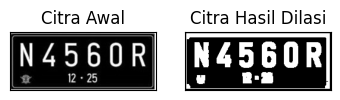

In [54]:
# Dilasi Tanpa Library

def dilasi_citra(F,w):
  #size image
  p,q = F.shape

  imgD = np.zeros((p,q), dtype=np.uint8)

  #generate struktur elemen dilasi
  SED = np.ones((w,w), dtype=np.uint8)
  constant1 = (w-1)//2

  #proses dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1, q-constant1):
      temp = F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product = temp*SED
      imgD[i,j] = np.max(product)
  return imgD

img_d = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 125, 200, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

4. Implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV

[[1 1 1]
 [1 1 1]
 [1 1 1]]


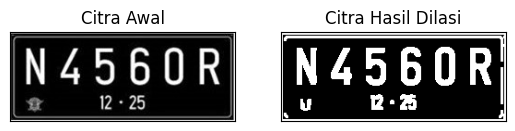

In [55]:
img = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/platnomer.jpg',0)

ret, tresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3), np.uint16)
dilasi = cv2.dilate(tresh, kernel, iterations=1)
print(kernel)

plt.subplot(121),plt.imshow(img, cmap = 'gray'),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilasi, cmap = 'gray'),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV

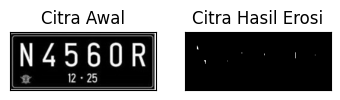

In [56]:
# Erosi tanpa library

def erosi_citra(F, k):
  m,n = F.shape
  imgE = np.zeros((m,n), dtype=np.uint8)

  #generate SE
  SE = np.ones((k,k), dtype=np.uint8)
  constant = (k-1)//2

  #proses erosi
  for i in range(constant, m-constant):
    for j in range(constant, n-constant):
      temp = F[i-constant:i+constant+1, j-constant:j+constant+1]
      product = temp*SE
      imgE[i,j] = np.min(product)
  return imgE

img_e = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/platnomer.jpg',0)
ret1, thresh1 = cv2.threshold(img_e, 175, 225, cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

6. Implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


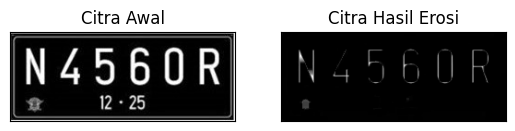

In [57]:
# Erosi Library

img = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/platnomer.jpg',0)

kernel = np.ones((5,5),np.uint8)
erosi= cv2.erode(img,kernel,iterations=1)
print(kernel)

plt.subplot(121),plt.imshow(img ,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosi, cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

7. Implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV.

- Operasi Opening Menggunakan tanpa Library Morphology

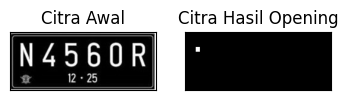

In [58]:
img_o = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/platnomer.jpg',0)
reto, thresho = cv2.threshold(img_o, 127, 225, cv2.THRESH_BINARY)
k=7
imgO = dilasi_citra(erosi_citra(thresho,k),k)
plt.subplot(131),plt.imshow(img_o,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgO,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

- Operasi Opening Menggunakan Library Morphology

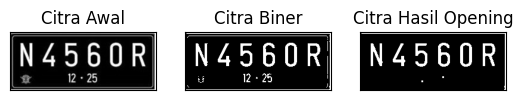

In [60]:
img_o2 = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
openn = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(openn,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]),
plt.yticks([])
plt.show()


8. Implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV

- Operasi closing tanpa library morphology

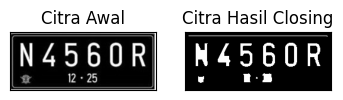

In [61]:
img_c = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/platnomer.jpg',0)
retc,threshc = cv2.threshold(img_c, 127, 225, cv2.THRESH_BINARY)
k=7
imgC = erosi_citra(dilasi_citra(thresho,k),k)

plt.subplot(131),plt.imshow(img_c,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgC,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]),
plt.yticks([])
plt.show()

- Operasi closing dengan library morphology

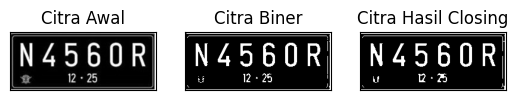

In [62]:
img = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
closs = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(closs,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()


9. Implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5

SED = Cross 3


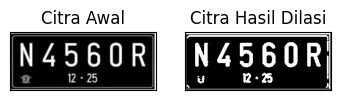

SED = Cross 5


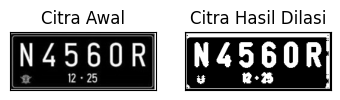

In [63]:
# CROSS 3x3
def dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  SED = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]], dtype = np.uint8)
  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

print('SED = Cross 3')
img_d= cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

# CROSS 5x5
def dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0],
                  [1, 1, 1, 1, 1],
                  [0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0]], dtype = np.uint8)

  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

print('SED = Cross 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,
cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

10. Implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5

SED = Circle 3


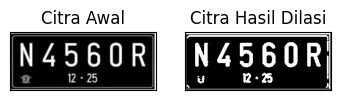

SED = Circle 5


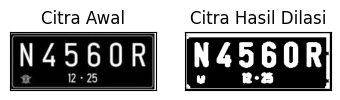

In [64]:
# Circular 3x3
def dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  SED= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(w,w))
  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

print('SED = Circle 3')
img_d= cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,
cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

# Circular 5x5
print('SED = Circle 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/platnomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

11. Implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7

SE = Rectangle 3x5


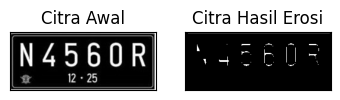

SE = Rectangle 5x7


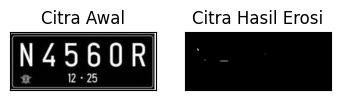

In [65]:
# Rectangle 3x5
def erosi_citra(F,p,l):
#size image
  m,n= F.shape
#Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_RECT,(p,l)) #SE persegi panjang
  constant1= (l-1)//2
  constant2= (p-1)//2
# print(SE)
  imgE= np.zeros((m,n), dtype=np.uint8)
#Proses Erosi
  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
      temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product= temp*SE
      imgE[i,j]= np.min(product)
  return imgE

print('SE = Rectangle 3x5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/platnomer.jpg',0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=5
l=3
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

# Rectangle 5x7
print('SE = Rectangle 5x7')
img_e= cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/platnomer.jpg',0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=7
l=5
imgE = erosi_citra(thresh1,p,l)
plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

12. implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5 (gambar j.jpg)

SE = Line Vertikal 3


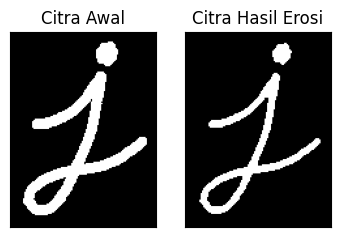

SE = Line Vertikal 5


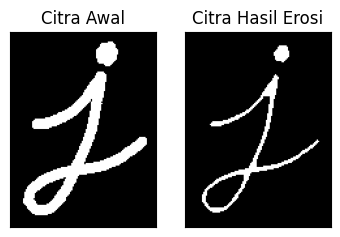

In [ ]:
# Erosi Line Vertikal SE

def erosi_citra(F, k):
    # Ukuran citra
    m, n = F.shape

    # Struktur elemen erosi (SE) berbentuk garis vertikal
    SE = cv2.getStructuringElement(cv2.MORPH_RECT, (1, k))  # SE line vertikal
    constant = (k - 1) // 2

    # Citra hasil erosi
    imgE = np.zeros((m, n), dtype=np.uint8)

    # Proses erosi
    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE

# Menampilkan hasil dengan SE line vertikal ukuran 3
print('SE = Line Vertikal 3')
img_e = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/j.png', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k = 3
imgE = erosi_citra(thresh1, k)

plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])

plt.show()

# Menampilkan hasil dengan SE line vertikal ukuran 5
print('SE = Line Vertikal 5')
img_e = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/j.png', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k = 5
imgE = erosi_citra(thresh1, k)

plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])

plt.show()


13. Top-Hat

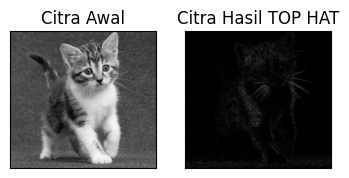

In [ ]:
# Getting kernel untuk filter Top-Hat

filterSize = (3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Membaca gambar dengan nama 'plat nomer.jpg'
img = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Menerapkan operasi Top-Hat
tophat_img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

# Menampilkan hasil
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(tophat_img, cmap='gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])

plt.show()


14. Black-Hat

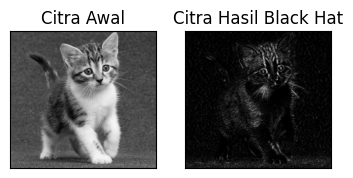

In [ ]:
# Mendapatkan kernel untuk filter Black-Hat

filterSize = (3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Membaca gambar bernama 'kitten01.jpg'
img = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Menerapkan operasi Black-Hat
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

# Menampilkan hasil
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(blackhat, cmap='gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])

plt.show()


15. Skeleton

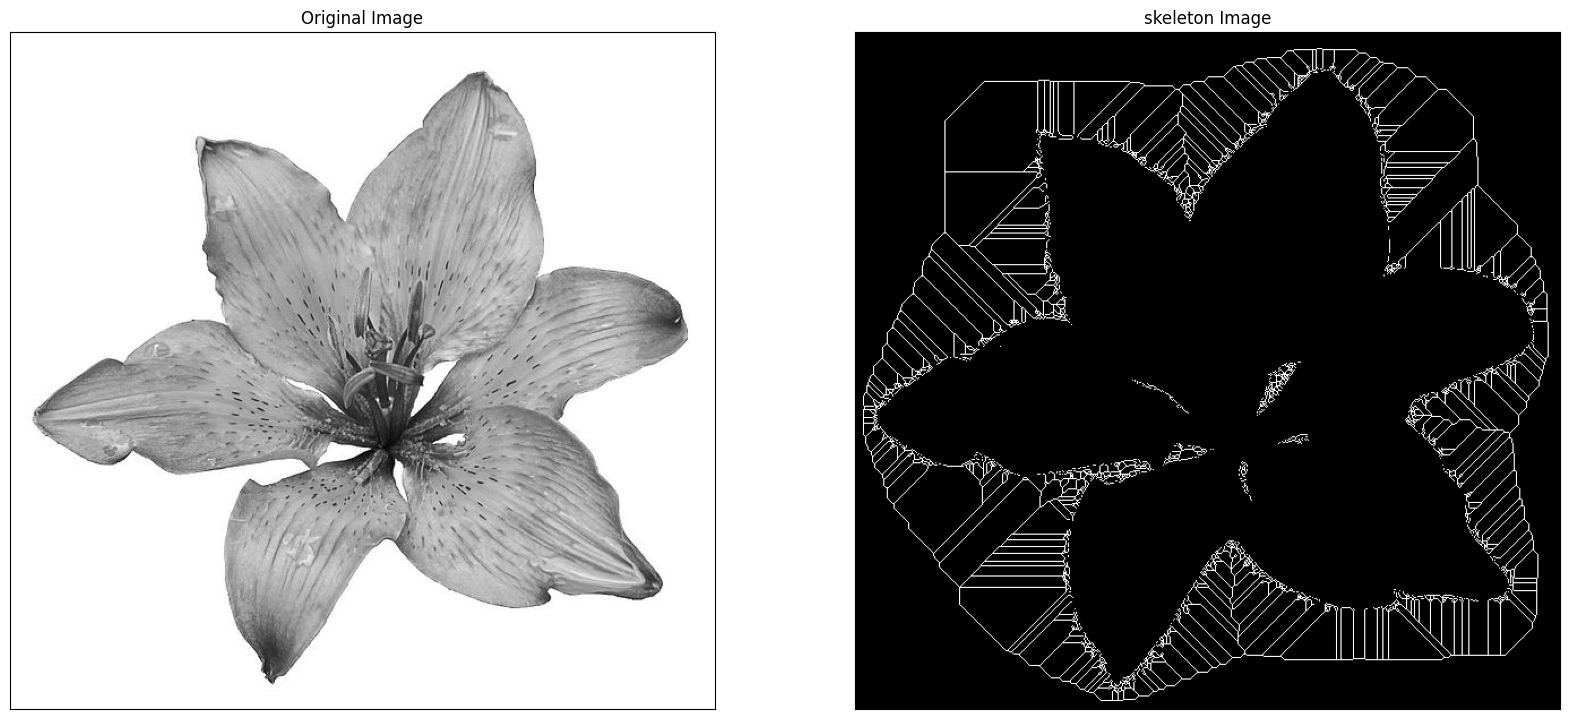

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize

# read image
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/lily.jpg',0)
binary = img > filters.threshold_triangle(img)

# true false to one
binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0

# skeletonize image
skeleton = skeletonize(binary_cp)

# print images
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton Image'), plt.xticks([]), plt.yticks([])
plt.savefig("binary and bin_skeleton.png")
plt.show()

16. Skeleton Inverse

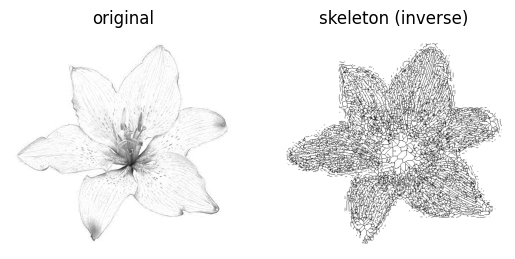

In [ ]:
from skimage import io
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize
# read image
img = io.imread('/content/drive/MyDrive/PCVK_MM/Images/lily.jpg')[..., 0]

# Note: we want the black bits to be True, so use <
binary = img < filters.threshold_triangle(img)

# skeletonize image
skeleton = skeletonize(binary)

# print images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()

# note the reversed colormap, gray_r
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()

plt.show()

17. Thickening

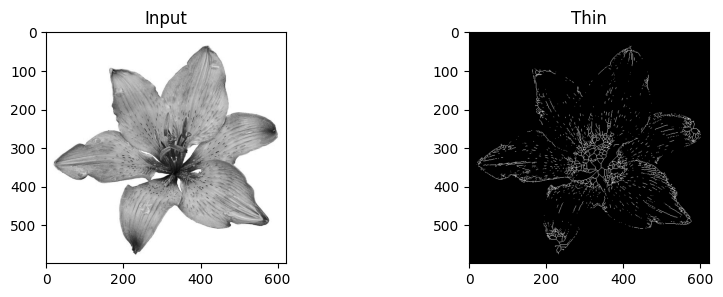

In [ ]:
from skimage import img_as_float
from skimage import io, color, morphology
import matplotlib.pyplot as plt

image =  img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/PCVK_MM/Images/lily.jpg')))
image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')
ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')
plt.savefig('/tmp/char_out.png')

plt.show()

# **TUGAS PRAKTIKUM**

Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam
Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam
modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya
adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra
tersebut.


**1. Erosi**

SE = Rectangle 1x3


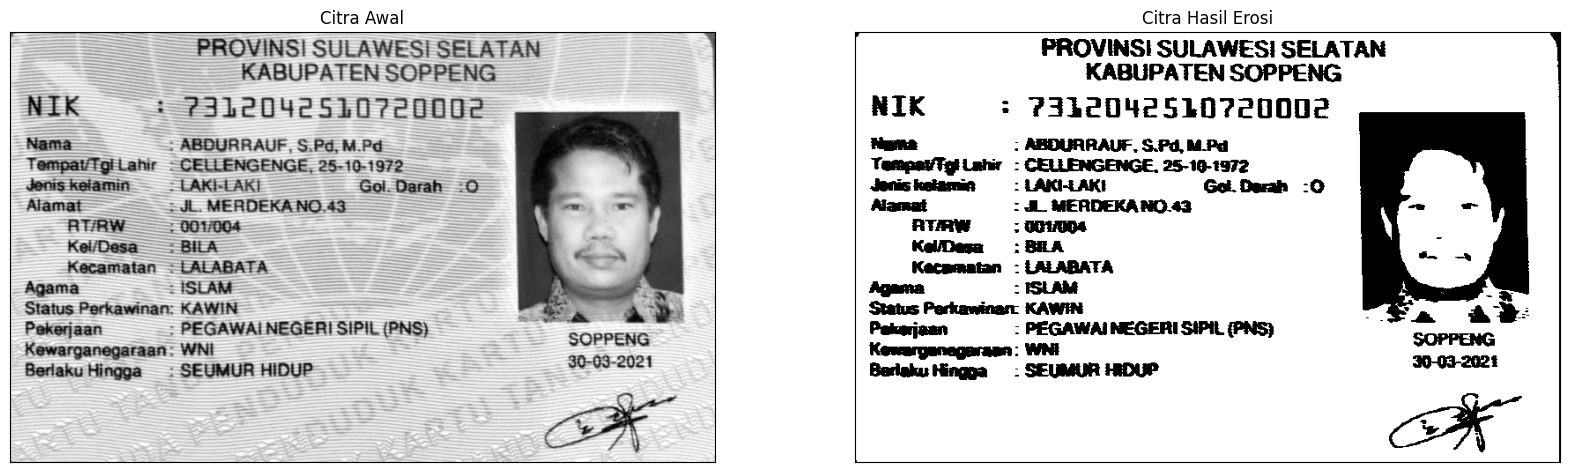

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Erosion function
def erosi_citra(F, p, l):
    m, n = F.shape
    SE = cv2.getStructuringElement(cv2.MORPH_RECT, (p, l))
    constant1 = (l-1)//2
    constant2 = (p-1)//2
    imgE = np.zeros((m, n), dtype=np.uint8)

    for i in range(constant1, m-constant1):
        for j in range(constant2, n-constant2):
            temp = F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
            product = temp * SE
            imgE[i, j] = np.min(product)
    return imgE

# Load image and apply binary threshold
print('SE = Rectangle 1x3')
img_e = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/KTP7.jpeg', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)

# Erosion parameters
p = 3
l = 1
imgE = erosi_citra(thresh1, p, l)

# Plot original and eroded images side by side
plt.figure(figsize=(20, 16))

# Original image
plt.subplot(121)
plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

# Eroded image
plt.subplot(122)
plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])

plt.show()

**2. Dilasi**

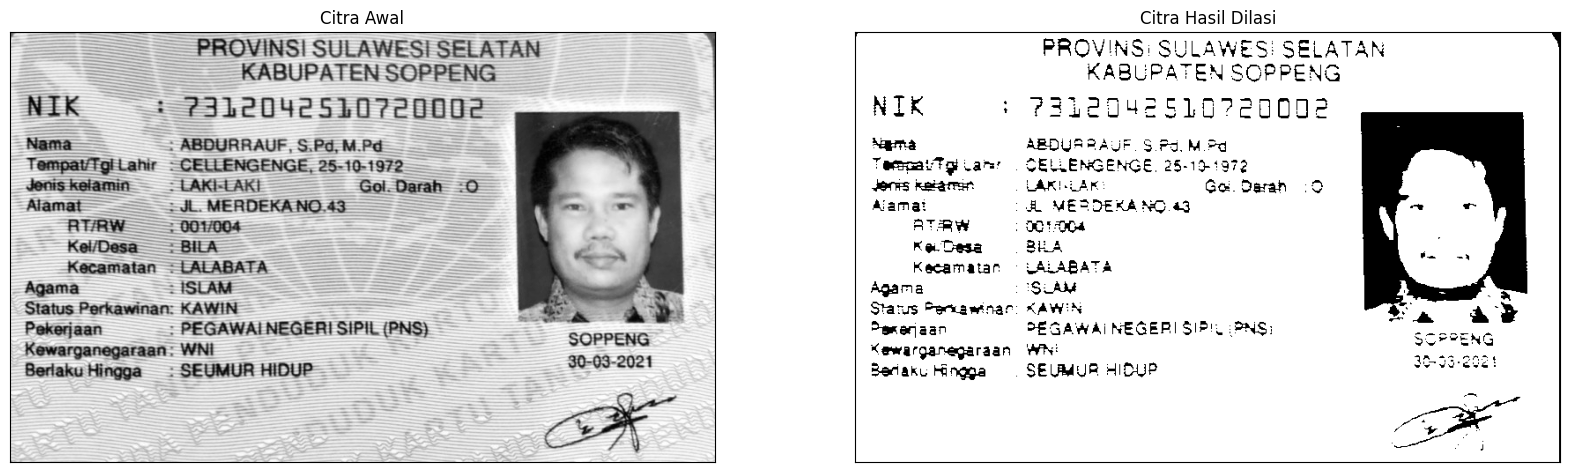

In [69]:
# Dilation function
def dilasi_citra(F, p, l):
    m, n = F.shape
    SE = cv2.getStructuringElement(cv2.MORPH_RECT, (p, l))
    constant1 = (l-1)//2
    constant2 = (p-1)//2
    imgD = np.zeros((m, n), dtype=np.uint8)

    for i in range(constant1, m-constant1):
        for j in range(constant2, n-constant2):
            temp = F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
            product = temp * SE
            imgD[i, j] = np.max(product)
    return imgD

# Read the image and apply binary threshold
img = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/KTP7.jpeg', 0)
ret1, thresh1 = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)

# Dilation parameters
p = 3
l = 1

# Apply dilation
imgE = dilasi_citra(thresh1, p, l)

# Plotting
plt.figure(figsize=(20, 16))

# Original image
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

# Dilated image
plt.subplot(122)
plt.imshow(imgE, cmap='gray')  # Change here to display dilated image
plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])

plt.show()

**3. Opening dan Closing**

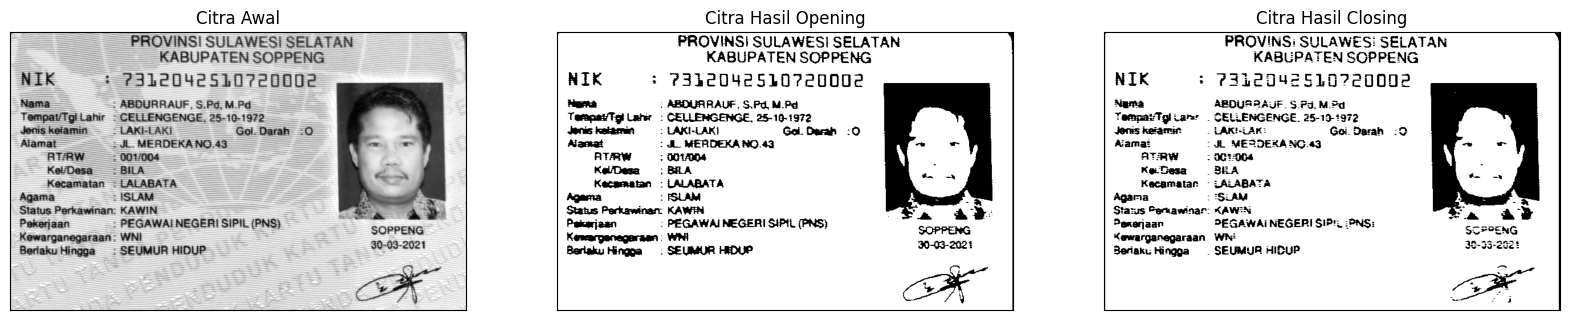

In [70]:
# Morphological Opening: Erosion followed by Dilation
def opening_citra(F, p, l):
    eroded = erosi_citra(F, p, l)
    opened = dilasi_citra(eroded, p, l)
    return opened

# Morphological Closing: Dilation followed by Erosion
def closing_citra(F, p, l):
    dilated = dilasi_citra(F, p, l)
    closed = erosi_citra(dilated, p, l)
    return closed

# Read image and binarize it
img_e = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/KTP7.jpeg', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)

p, l = 3, 1  # Structuring element size

# Apply Opening and Closing
img_opening = opening_citra(thresh1, p, l)
img_closing = closing_citra(thresh1, p, l)

# Plot results
plt.figure(figsize=(20, 16))

plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(img_opening, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(img_closing, cmap='gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])

plt.show()


**4. Top-Hat dan Black-Hat**

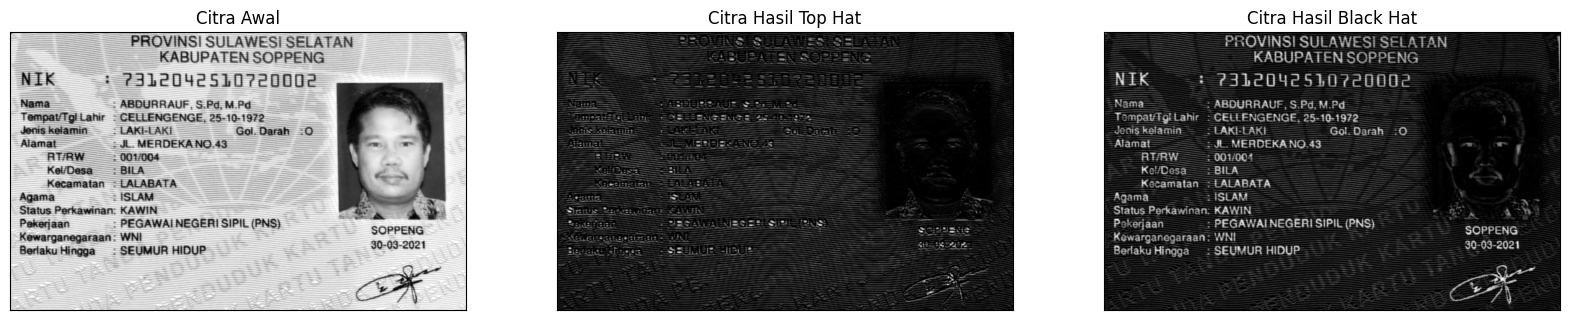

In [75]:
import cv2
import matplotlib.pyplot as plt

# Define filter size and kernel for top hat and black hat operations
filterSize = (3, 6)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Load and preprocess images
img = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/KTP7.jpeg')
input_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img2 = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/KTP7.jpeg')
input_image2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Apply morphological operations
tophat_img = cv2.morphologyEx(input_image, cv2.MORPH_TOPHAT, kernel)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat_img = cv2.morphologyEx(input_image2, cv2.MORPH_BLACKHAT, Kernel)

# Plot the images side-by-side
plt.figure(figsize=(20, 8)), plt.subplot(1, 3, 1), plt.imshow(input_image, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2), plt.imshow(tophat_img, cmap='gray')
plt.title('Citra Hasil Top Hat'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3), plt.imshow(blackhat_img, cmap='gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])

plt.show()
